In [1]:
# install.packages("tidyverse")
library(ggplot2)

In [2]:
# functions
lm_eqn <- function(m){
    eq <- substitute(italic(y) == a + b * italic(x)*","~~italic(r)^2~"="~r2, 
         list(a = format(unname(coef(m)[1]), digits = 5),
              b = format(unname(coef(m)[2]), digits = 5),
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(eq));
}

In [3]:
dataFull <- read.csv("mdpv4.csv", header=TRUE)
dataFull <- dataFull[dataFull$alpha <= 1, ]

In [4]:
# data0 <- data[data$trial == 0,]
# data1 <- data[data$trial == 1,]
# data2 <- data[data$trial == 2,]

data <- dataFull[dataFull$envSeed == 3701 & dataFull$alpha == 0.4 & dataFull$syncBackups == 1,]

In [5]:
head(data, 2)
print("rows")
nrow(dataFull)
print("cols")
ncol(dataFull)
print("unique alpha")
sort(unique(dataFull$alpha))

print(paste("random score", head(data, 1)$endScoreRand, "bellman score", head(data, 1)$endScoreBell))

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,endScoreRand,aggs,backups,endScoreStochBell,endScore,finalDiff,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
181,10,0.4,0.6,0,4,1,True,3701,0,30300,⋯,1275.329,30294,30300,2119.566,4074.901,0.4650989,0.2937817,22.51547,10,2020
296,10,0.4,0.6,0,8,1,True,3701,1,30300,⋯,1211.888,30235,30300,2105.508,3898.605,0.5170388,0.2622585,23.96695,0,1010


[1] "rows"


[1] 1920

[1] "cols"


[1] 25

[1] "unique alpha"


[1] 0.001 0.002 0.004 0.005 0.008 0.010 0.016 0.020 0.032 0.040 0.050 0.080
[13] 0.100 0.160 0.200 0.320 0.400 0.500 0.800 1.000

[1] "random score 1275.32935695992 bellman score 3913.43256758843"



Call:
lm(formula = log10(sqDiff) ~ log10(N), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41442 -0.13977  0.01081  0.15042  0.38395 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.66172    0.06947 -23.921  < 2e-16 ***
log10(N)    -0.87910    0.09421  -9.331 4.34e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2197 on 28 degrees of freedom
Multiple R-squared:  0.7567,	Adjusted R-squared:  0.748 
F-statistic: 87.07 on 1 and 28 DF,  p-value: 4.336e-10


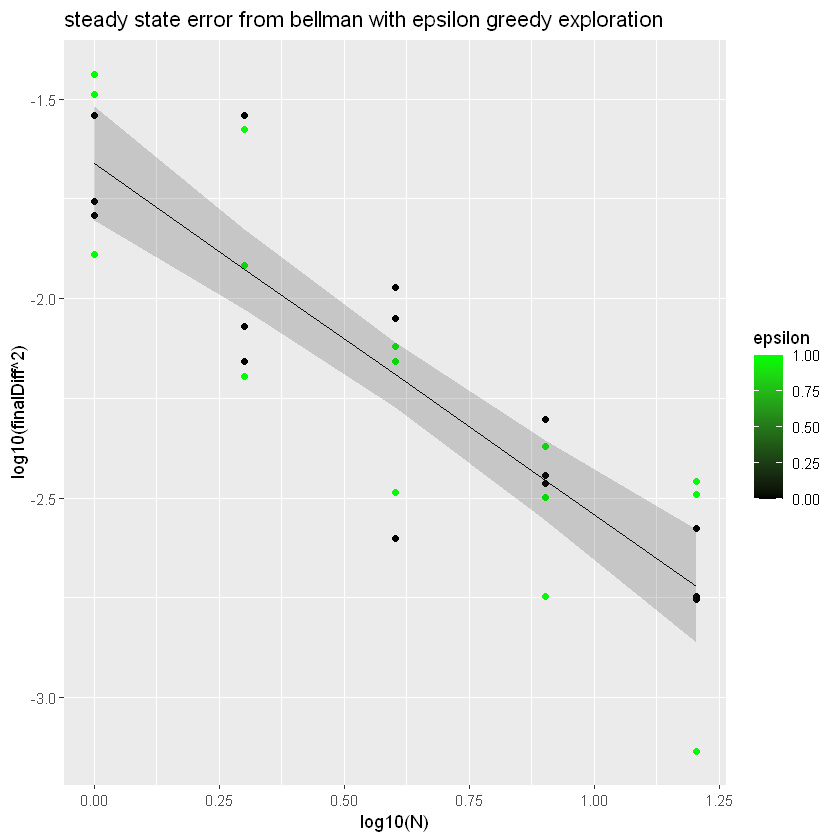

In [6]:
title <- "steady state error from bellman with epsilon greedy exploration"
data <- dataFull[dataFull$alpha == 0.01 & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
N = data$fedP
sqDiff = data$finalDiff ** 2
model <- lm(log10(sqDiff) ~ log10(N), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=log10(N), y=log10(finalDiff ** 2)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + geom_line(aes(log10(fedP), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

Warning message in eval(expr, envir, enclos):
"NaNs produced"



Call:
lm(formula = log10(sqDiff) ~ log10(N) * syncLog, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74168 -0.20252  0.03239  0.18016  0.62405 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.61937    0.07385 -21.926  < 2e-16 ***
log10(N)         -1.03819    0.09607 -10.807  < 2e-16 ***
syncLog          -0.03283    0.03438  -0.955    0.342    
log10(N):syncLog  0.21895    0.04327   5.060  1.5e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2629 on 122 degrees of freedom
Multiple R-squared:  0.5856,	Adjusted R-squared:  0.5754 
F-statistic: 57.46 on 3 and 122 DF,  p-value: < 2.2e-16


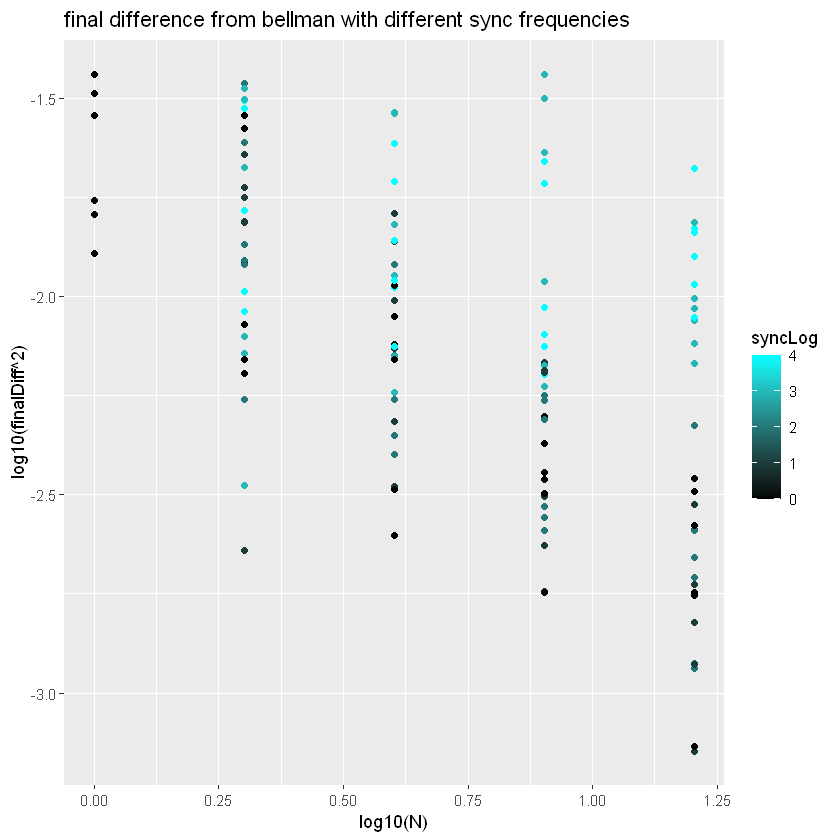

In [7]:
title <- "final difference from bellman with different sync frequencies"
data <- dataFull[dataFull$alpha == 0.01,]
N = data$fedP
sqDiff = data$finalDiff ** 2
syncLog <- log10(data$syncBackups)
syncLog[is.nan(syncLog)] <- 0
model <- lm(log10(sqDiff) ~ log10(N)*syncLog, data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=log10(N), y=log10(finalDiff ** 2)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = syncLog))
p <- p + scale_color_gradientn(colors = c("black", "cyan"))
p


Call:
lm(formula = log10(sqDiff) ~ log10(N) * log10(alpha), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12897 -0.18637  0.01422  0.19388  0.89764 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.59947    0.04954  12.101   <2e-16 ***
log10(N)              -1.02168    0.06252 -16.342   <2e-16 ***
log10(alpha)           1.03655    0.02841  36.480   <2e-16 ***
log10(N):log10(alpha) -0.01062    0.03731  -0.285    0.776    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2884 on 428 degrees of freedom
Multiple R-squared:  0.9229,	Adjusted R-squared:  0.9223 
F-statistic:  1707 on 3 and 428 DF,  p-value: < 2.2e-16


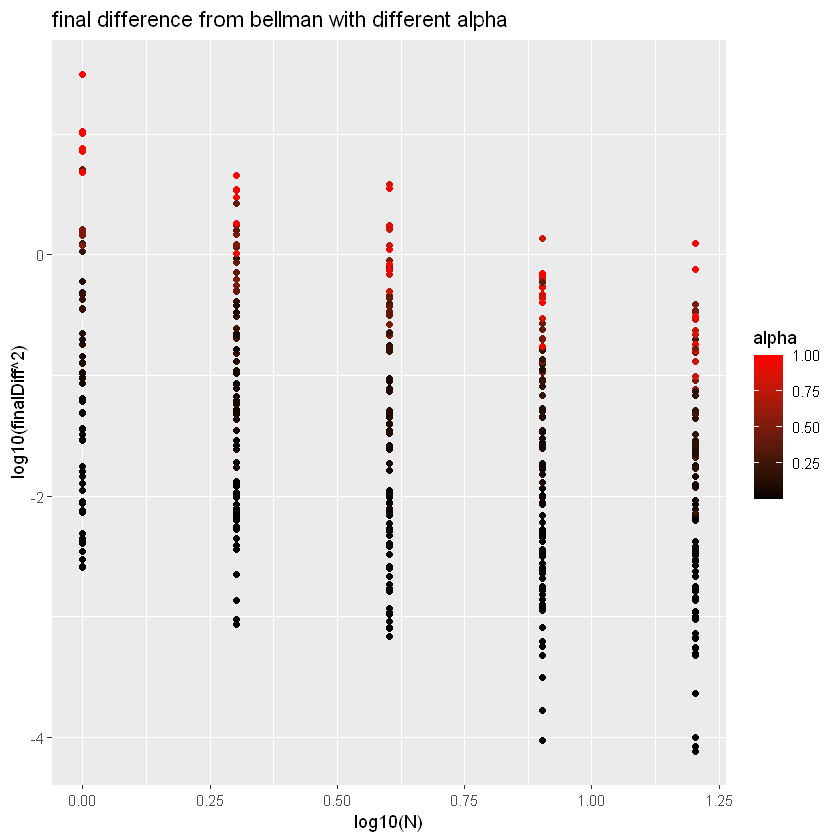

In [8]:
title <- "final difference from bellman with different alpha"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
N = data$fedP
sqDiff = data$finalDiff ** 2
model <- lm(log10(sqDiff) ~ log10(N)*log10(alpha), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=log10(N), y=log10(finalDiff ** 2)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn(colors = c("black", "red"))
p


Call:
lm(formula = log10(sqDiff) ~ log10(NTerm), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11574 -0.18473  0.01675  0.19242  0.89894 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.59817    0.03259   18.36   <2e-16 ***
log10(NTerm)  1.02645    0.01432   71.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2879 on 430 degrees of freedom
Multiple R-squared:  0.9228,	Adjusted R-squared:  0.9226 
F-statistic:  5138 on 1 and 430 DF,  p-value: < 2.2e-16


Saving 6.67 x 6.67 in image


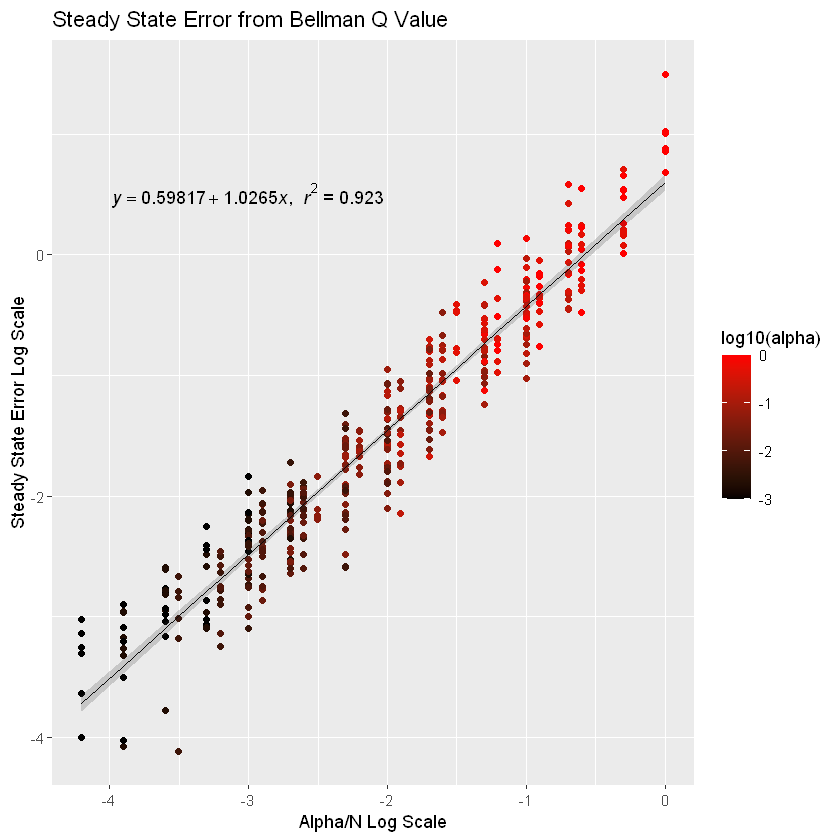

In [9]:
title <- "Steady State Error from Bellman Q Value"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
NTerm = data$alpha/data$fedP
sqDiff = data$finalDiff ** 2
model <- lm(log10(sqDiff) ~ log10(NTerm), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=log10(NTerm), y=log10(finalDiff ** 2)))
p <- p + ggtitle(title)
p <- p + xlab("Alpha/N Log Scale") + ylab("Steady State Error Log Scale")
p <- p + annotate("text", x=-3, y=0.5, label= lm_eqn(model), parse = TRUE)
p <- p + geom_point(aes(color = log10(alpha)))
p <- p + scale_color_gradientn(colors = c("black", "red"))
p <- p + geom_line(aes(log10(NTerm), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", title, ".png"), fixed = TRUE), plot=p, device="png")

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,endScoreRand,aggs,backups,endScoreStochBell,endScore,finalDiff,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
32,10,0.005,0.6,0,16,1,True,3701,0,80800,⋯,1185.387,80596,80800,2132.373,3898.605,0.046355344,0.3119777,19.464512,160,17170
59,10,0.005,0.6,0,1,-1,True,3701,0,50500,⋯,1310.680,0,50500,2147.475,3835.729,0.050978605,0.2895518,20.485319,160,17170
210,10,0.005,0.6,0,4,1,True,3701,1,70700,⋯,1312.867,70674,70700,2198.647,3898.605,0.076964535,0.3036172,23.420292,170,18180
241,10,0.005,0.6,1,8,1,True,3701,0,50500,⋯,1135.738,50443,50500,2190.005,3898.605,0.023955653,0.2651755,10.876106,140,15150
274,10,0.005,0.6,1,16,1,True,3701,2,50500,⋯,1327.228,50335,50500,2168.222,3898.605,0.031215578,0.3083706,11.955045,140,15150
456,10,0.005,0.6,1,4,1,True,3701,1,50500,⋯,1221.823,52510,50500,2109.417,3898.605,0.085942564,0.3011236,12.960507,130,14140
577,10,0.005,0.6,1,1,-1,True,3701,0,40400,⋯,1190.662,0,40400,2126.969,3885.501,0.050852535,0.2830133,12.940039,150,16160
649,10,0.005,0.6,1,8,1,True,3701,2,60600,⋯,1150.744,60482,60600,2060.283,3898.605,0.048335307,0.3046655,12.051033,150,16160
672,10,0.005,0.6,0,4,1,True,3701,0,60600,⋯,1348.077,60585,60600,2129.140,3898.605,0.046621370,0.2926458,24.455698,160,17170



Call:
lm(formula = log10(T) ~ log10(N), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06997 -0.02770 -0.01198  0.02665  0.09997 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.23272    0.01408  300.59   <2e-16 ***
log10(N)    -0.02043    0.01910   -1.07    0.294    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04453 on 28 degrees of freedom
Multiple R-squared:  0.03928,	Adjusted R-squared:  0.004964 
F-statistic: 1.145 on 1 and 28 DF,  p-value: 0.2938


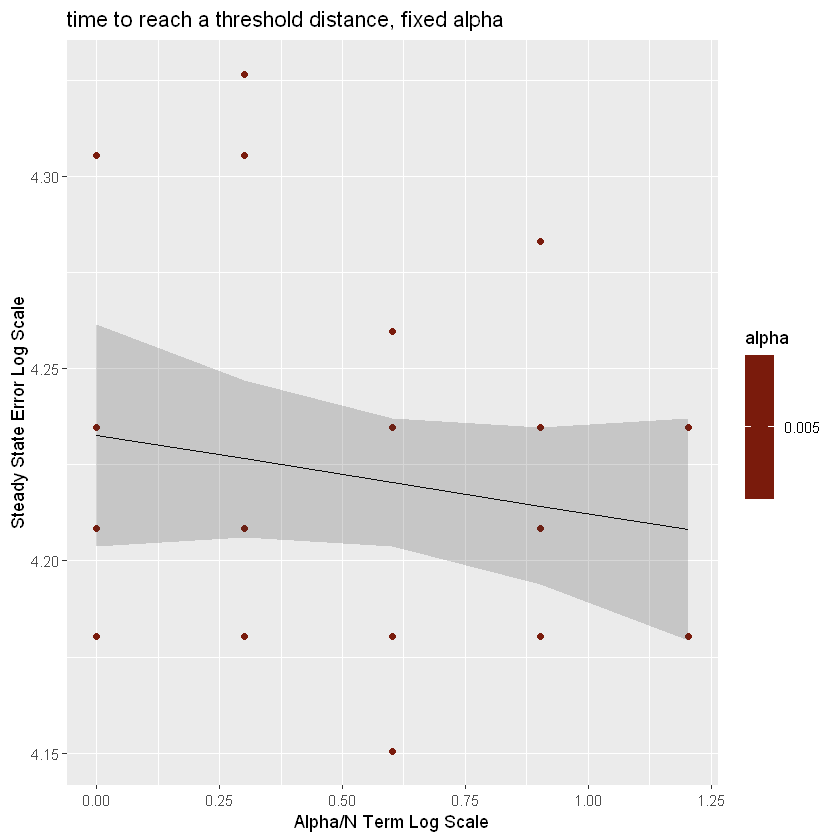

In [10]:
title <- "time to reach a threshold distance, fixed alpha"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$threshDiff ** 2 <= 0.5 & dataFull$alpha == 0.005,]
data

N = data$fedP
T = data$threshBack
model <- lm(log10(T) ~ log10(N), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))


p <- ggplot(predict, aes(x=log10(N), y=log10(T)))
p <- p + ggtitle(title)
p <- p + xlab("Alpha/N Term Log Scale") + ylab("Steady State Error Log Scale")
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn(colors = c("black", "red"))
p <- p + geom_line(aes(log10(N), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,endScoreRand,aggs,backups,endScoreStochBell,endScore,finalDiff,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
17,10,0.016,0.6,0,8,1,True,3701,1,40400,⋯,1160.608,40320,40400,2007.561,3898.605,0.04771012,0.3139974,25.56619,40,5050
20,10,0.016,0.6,0,8,1,True,3701,2,30300,⋯,1274.193,30151,30300,2150.766,3898.605,0.05264867,0.2796279,20.61795,50,6060



Call:
lm(formula = log10(T) ~ log10(N), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08029 -0.02672  0.01635  0.01843  0.05099 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.59907    0.01116  412.27   <2e-16 ***
log10(N)    -0.94347    0.01513  -62.36   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03528 on 28 degrees of freedom
Multiple R-squared:  0.9929,	Adjusted R-squared:  0.9926 
F-statistic:  3889 on 1 and 28 DF,  p-value: < 2.2e-16


Saving 6.67 x 6.67 in image


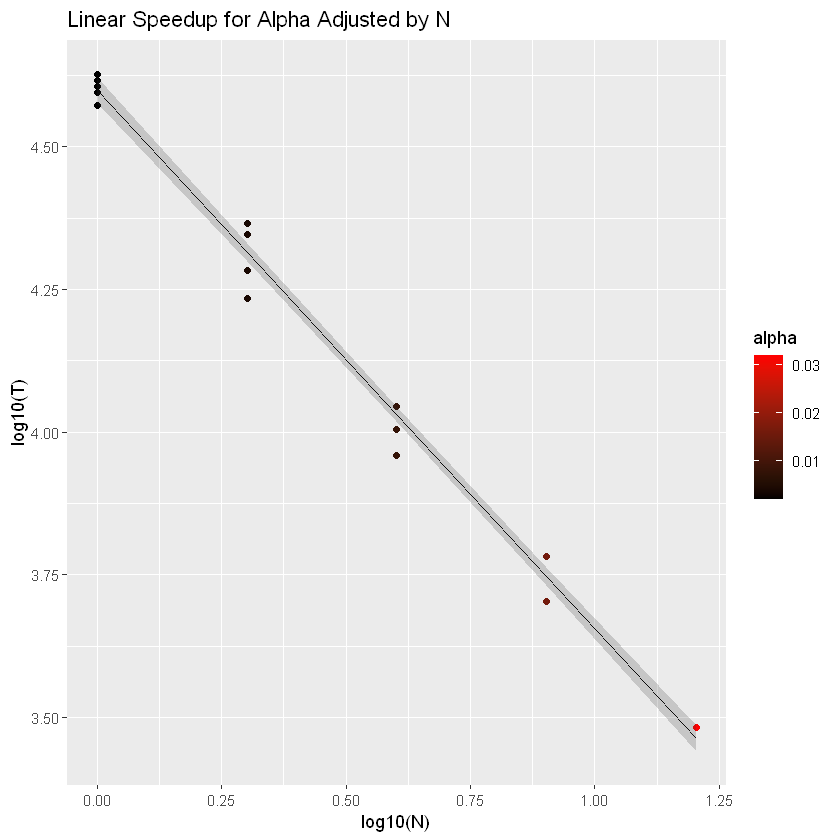

In [11]:
title <- "Linear Speedup for Alpha Adjusted by N"
A <- 0.002
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$threshDiff ** 2 <= 0.1 & dataFull$alpha == A * dataFull$fedP,]
head(data,2)

N = data$fedP
T = data$threshBack
model <- lm(log10(T) ~ log10(N), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))


p <- ggplot(predict, aes(x=log10(N), y=log10(T)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn(colors = c("black", "red"))
p <- p + geom_line(aes(log10(N), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", title, ".png"), fixed = TRUE), plot=p, device="png")

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,endScoreRand,aggs,backups,endScoreStochBell,endScore,finalDiff,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
204,10,0.032,0.6,0,16,10000,True,3701,1,30300,⋯,1206.396,3,30300,2154.848,3898.605,0.2949294,0.1753303,22.462991,20,3030
227,10,0.032,0.6,1,16,10000,True,3701,2,30300,⋯,1325.239,3,30300,2117.443,3898.605,0.1562354,0.2852583,9.726253,20,3030



Call:
lm(formula = log10(T) ~ log10(N), data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.193037 -0.054101 -0.003994  0.048868  0.307405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.57163    0.02913  156.96   <2e-16 ***
log10(N)    -0.85508    0.03950  -21.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0921 on 28 degrees of freedom
Multiple R-squared:  0.9436,	Adjusted R-squared:  0.9416 
F-statistic: 468.6 on 1 and 28 DF,  p-value: < 2.2e-16


Saving 6.67 x 6.67 in image


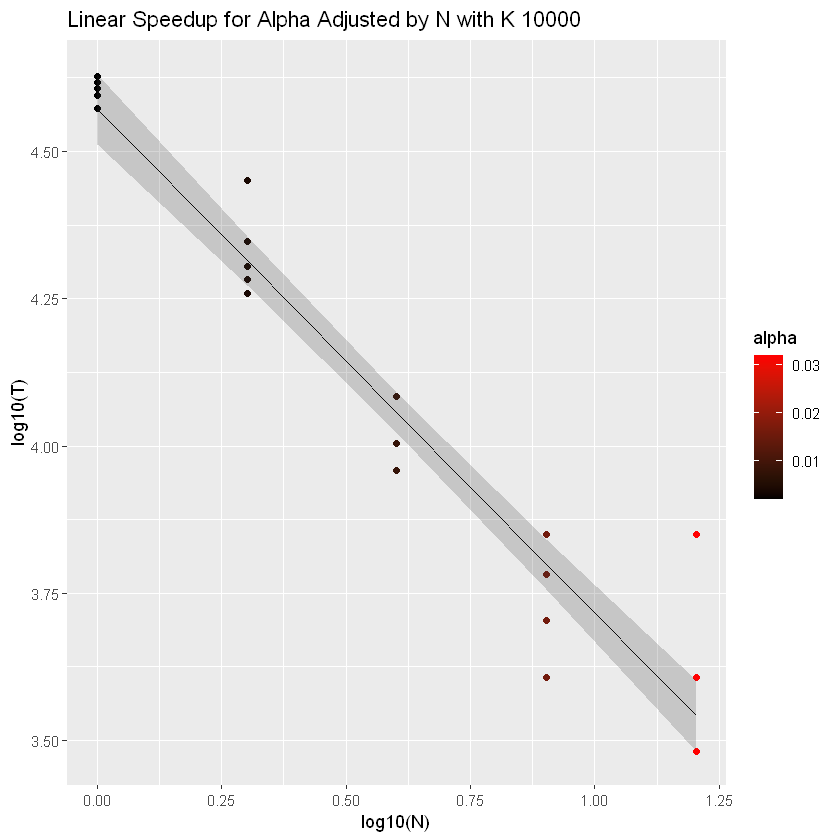

In [12]:
K <- 10000
title <- paste("Linear Speedup for Alpha Adjusted by N with K", K)
data <- dataFull[(dataFull$syncBackups == K | dataFull$syncBackups == -1) & dataFull$threshDiff ** 2 <= 0.1 & dataFull$alpha == A * dataFull$fedP,]
head(data,2)

N = data$fedP
T = data$threshBack
model <- lm(log10(T) ~ log10(N), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))


p <- ggplot(predict, aes(x=log10(N), y=log10(T)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn(colors = c("black", "red"))
p <- p + geom_line(aes(log10(N), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", title, ".png"), fixed = TRUE), plot=p, device="png")

$D^2 <= (1 – \alpha)^T + \frac{\alpha}{N} + (K-1) \alpha ^2$

Since linear speedup is dependant on scaling alpha by N while getting the same steady state error, using a learning rate $\alpha' = \alpha N$, the equation is 

$D^2 <= (1 – \alpha N)^T + \alpha + (K-1) (\alpha N) ^2$

In the limit as K aproaches infinity, the equation should look the same as K=1 and N=1, since this is essentially independantly training N models.

$D^2 <= (1 – \alpha')^T + \alpha'$

[1] "N term model"



Call:
lm(formula = log10(sqDiff) ~ log10(NTerm), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40217 -0.33129 -0.07058  0.26535  1.58438 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.96005    0.02647   36.27   <2e-16 ***
log10(NTerm)  1.08748    0.01136   95.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4705 on 1918 degrees of freedom
Multiple R-squared:  0.8269,	Adjusted R-squared:  0.8268 
F-statistic:  9160 on 1 and 1918 DF,  p-value: < 2.2e-16


[1] "theoretical model"



Call:
lm(formula = sqDiff ~ NTerm + KTerm, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7457 -0.1258 -0.0407 -0.0300 24.4566 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.009e-02  3.482e-02   0.864    0.388    
NTerm       9.068e+00  3.213e-01  28.228   <2e-16 ***
KTerm       7.324e-04  2.515e-05  29.115   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.383 on 1917 degrees of freedom
Multiple R-squared:  0.5364,	Adjusted R-squared:  0.5359 
F-statistic:  1109 on 2 and 1917 DF,  p-value: < 2.2e-16


[1] "added other variables"



Call:
lm(formula = sqDiff ~ NTerm + KTerm + I(alpha^2) + I(syncBackups - 
    1) + I((syncBackups - 1) * (alpha^1)) + I((syncBackups - 
    1) * (alpha^3)) + I((syncBackups - 1)^2 * (alpha^2)), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7833 -0.0553  0.0336  0.0536 24.3299 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -5.509e-02  3.521e-02  -1.565 0.117814    
NTerm                               6.574e+00  3.720e-01  17.672  < 2e-16 ***
KTerm                               4.628e-03  5.735e-04   8.069 1.24e-15 ***
I(alpha^2)                          5.645e-01  1.657e-01   3.407 0.000671 ***
I(syncBackups - 1)                  2.349e-06  1.030e-05   0.228 0.819620    
I((syncBackups - 1) * (alpha^1))    3.276e-04  1.726e-04   1.898 0.057830 .  
I((syncBackups - 1) * (alpha^3))    1.212e-03  3.530e-04   3.434 0.000607 ***
I((syncBackups - 1)^2 * (alpha^2)) -5.420e-07  2.700e-08 -2

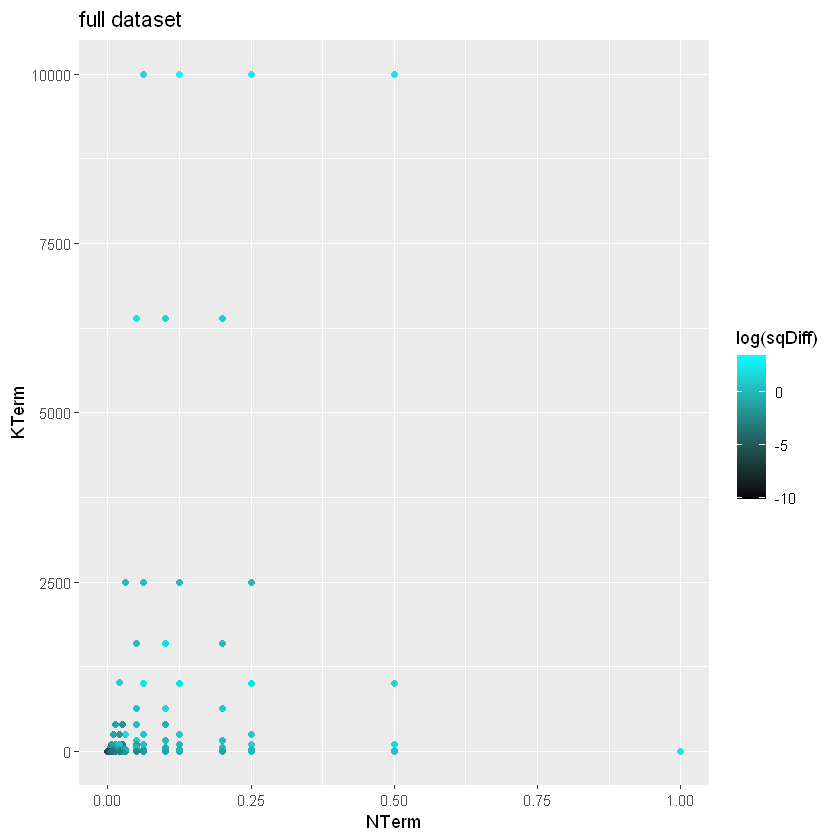

In [13]:
title <- "full dataset"
data <- dataFull
data$syncBackups[data$syncBackups == -1] <- 1

ifedP = 1/data$fedP
NTerm = data$alpha/data$fedP
KTerm = (data$syncBackups - 1) * (data$alpha ** 2)
sqDiff = data$finalDiff ** 2

Nmodel <- lm(log10(sqDiff) ~ log10(NTerm), data)
print("N term model")
summary(Nmodel)

model <- lm(sqDiff ~ NTerm + KTerm, data)
print("theoretical model")
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

print("added other variables")
modelCofounded <- lm(sqDiff ~ NTerm + KTerm + I(alpha**2) + I(syncBackups - 1) + I((syncBackups - 1) * (alpha ** 1)) + I((syncBackups - 1) * (alpha ** 3)) + I((syncBackups - 1)**2 * (alpha ** 2)), data)
summary(modelCofounded)


p <- ggplot(predict, aes(x=NTerm, y=KTerm))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = log(sqDiff))) 
p <- p + scale_color_gradientn(colors = c("black", "cyan"))
p

[1] "N term model"



Call:
lm(formula = log10(sqDiff) ~ log10(NTerm), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40217 -0.33129 -0.07058  0.26535  1.58438 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.96005    0.02647   36.27   <2e-16 ***
log10(NTerm)  1.08748    0.01136   95.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4705 on 1918 degrees of freedom
Multiple R-squared:  0.8269,	Adjusted R-squared:  0.8268 
F-statistic:  9160 on 1 and 1918 DF,  p-value: < 2.2e-16


[1] "theoretical model"



Call:
lm(formula = sqDiff ~ NTerm + KTerm, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7457 -0.1258 -0.0407 -0.0300 24.4566 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.009e-02  3.482e-02   0.864    0.388    
NTerm       9.068e+00  3.213e-01  28.228   <2e-16 ***
KTerm       7.324e-04  2.515e-05  29.115   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.383 on 1917 degrees of freedom
Multiple R-squared:  0.5364,	Adjusted R-squared:  0.5359 
F-statistic:  1109 on 2 and 1917 DF,  p-value: < 2.2e-16


[1] "added other variables"



Call:
lm(formula = sqDiff ~ NTerm + KTerm + I(alpha^2) + I(syncBackups - 
    1) + I((syncBackups - 1) * (alpha^1)) + I((syncBackups - 
    1) * (alpha^3)) + I((syncBackups - 1)^2 * (alpha^2)), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7833 -0.0553  0.0336  0.0536 24.3299 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -5.509e-02  3.521e-02  -1.565 0.117814    
NTerm                               6.574e+00  3.720e-01  17.672  < 2e-16 ***
KTerm                               4.628e-03  5.735e-04   8.069 1.24e-15 ***
I(alpha^2)                          5.645e-01  1.657e-01   3.407 0.000671 ***
I(syncBackups - 1)                  2.349e-06  1.030e-05   0.228 0.819620    
I((syncBackups - 1) * (alpha^1))    3.276e-04  1.726e-04   1.898 0.057830 .  
I((syncBackups - 1) * (alpha^3))    1.212e-03  3.530e-04   3.434 0.000607 ***
I((syncBackups - 1)^2 * (alpha^2)) -5.420e-07  2.700e-08 -2

[1] 0.10 0.16 0.20 0.32 0.50 0.80 1.00

[1] 16

[1]  1000 10000

[1] "N = 16, K != 1"



Call:
lm(formula = log10(sqDiffN16) ~ log10(NTermN16), data = predictN16)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70535 -0.15056  0.01615  0.14078  0.46045 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.38386    0.13978   17.05   <2e-16 ***
log10(NTermN16)  1.36157    0.08114   16.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2557 on 82 degrees of freedom
Multiple R-squared:  0.7745,	Adjusted R-squared:  0.7717 
F-statistic: 281.6 on 1 and 82 DF,  p-value: < 2.2e-16


Warning message:
"'newdata' had 1920 rows but variables found have 84 rows"


[1] "New equation N = 16, K != 1"



Call:
lm(formula = log10(sqDiffN16) ~ I(log10(predictN16$syncBackups - 
    1)) + I(log10(predictN16$alpha)) + I(1/(predictN16$fedP * 
    predictN16$alpha * (predictN16$syncBackups - 1))), data = predictN16)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68133 -0.14511  0.01783  0.14868  0.47528 

Coefficients:
                                                                          Estimate
(Intercept)                                                                0.38100
I(log10(predictN16$syncBackups - 1))                                       0.10349
I(log10(predictN16$alpha))                                                 1.51527
I(1/(predictN16$fedP * predictN16$alpha * (predictN16$syncBackups - 1))) 536.78012
                                                                         Std. Error
(Intercept)                                                                 0.31765
I(log10(predictN16$syncBackups - 1))                                        0.08958
I(lo

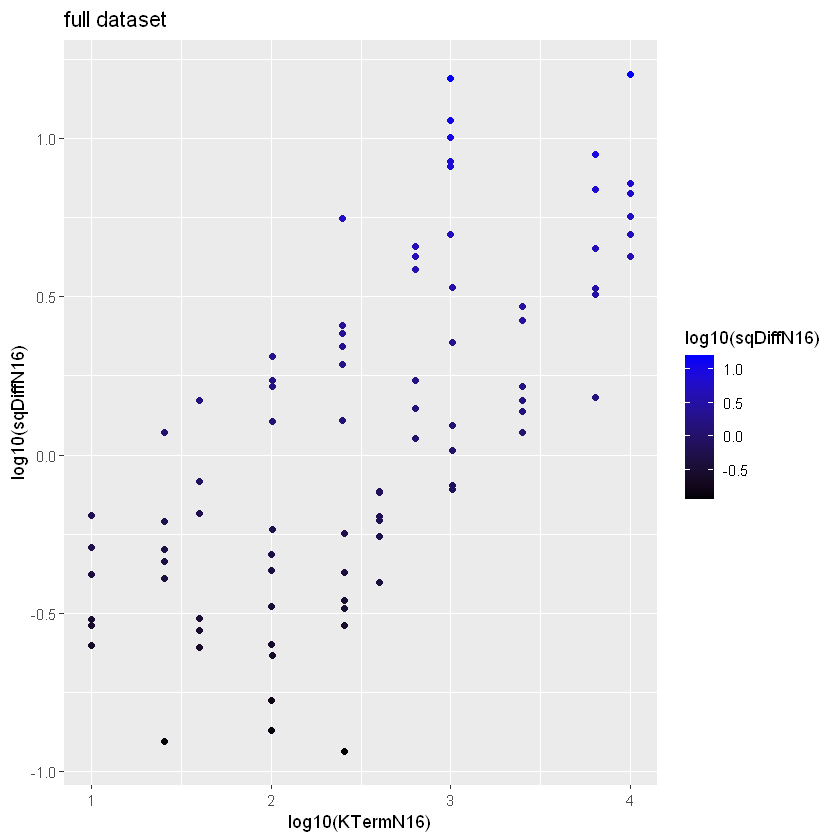

In [30]:
title <- "full dataset"
data <- dataFull
data$syncBackups[data$syncBackups == -1] <- 1

ifedP = 1/data$fedP
NTerm = data$alpha/data$fedP
KTerm = (data$syncBackups - 1) * (data$alpha ** 2)
sqDiff = data$finalDiff ** 2

Nmodel <- lm(log10(sqDiff) ~ log10(NTerm), data)
print("N term model")
summary(Nmodel)

model <- lm(sqDiff ~ NTerm + KTerm, data)
print("theoretical model")
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

print("added other variables")
modelCofounded <- lm(sqDiff ~ NTerm + KTerm + I(alpha**2) + I(syncBackups - 1) + I((syncBackups - 1) * (alpha ** 1)) + I((syncBackups - 1) * (alpha ** 3)) + I((syncBackups - 1)**2 * (alpha ** 2)), data)
summary(modelCofounded)


predictN16 <- predict[predict$fedP == 16 & predict$syncBackups != 1 & predict$syncBackups >= 1000 & predict$alpha >= 0.1, ]
sort(unique(predictN16$alpha))
sort(unique(predictN16$fedP))
sort(unique(predictN16$syncBackups))

NTermN16 = predictN16$alpha/predictN16$fedP
KTermN16 = (predictN16$syncBackups - 1) * (predictN16$alpha ** 2)
sqDiffN16 = predictN16$finalDiff ** 2

p <- ggplot(predictN16, aes(x=log10(KTermN16), y=log10(sqDiffN16)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = log10(sqDiffN16))) 
p <- p + scale_color_gradientn(colors = c("black", "blue"))
p

model <- lm(log10(sqDiffN16) ~ log10(NTermN16), predictN16)
print("N = 16, K != 1")
summary(model)
predictN16 <- cbind(predictN16, predict(model, interval='confidence', newdata=data))

model <- lm(log10(sqDiffN16) ~ I(log10(predictN16$syncBackups - 1)) + I(log10(predictN16$alpha)) + I(1/(predictN16$fedP * predictN16$alpha * (predictN16$syncBackups - 1))), predictN16)
print("New equation N = 16, K != 1")
summary(model)


Linear Space K 1000 to 10000
Larger N 256
Alpha 0.1 to 0.6

K might not be tight <= 1

Reduce the fraction term to just get an isolated log of Kterm

In [ ]:
dataK1 <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
NmodelK1 <- lm(finalDiff ** 2 ~ I(alpha/fedP) - 1, dataK1)
print("N term model K=1")
summary(NmodelK1)

predictFromK1 <- cbind(data, predict(NmodelK1, interval='confidence', newdata=data))

model <- lm(log10(finalDiff ** 2 - fit) ~ log10(KTerm+0.0001), predictFromK1)
print("theoretical model remove NTerm")
summary(model)